In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [4]:
from google.colab import files
files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


{'test.csv': b'ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X

In [118]:
train = pd.read_csv('train.csv')
print('Train shape: ', train.shape)
test = pd.read_csv('test.csv')
print('test shape: ', test.shape)

Train shape:  (4209, 378)
test shape:  (4209, 377)


In [0]:
train1= train
test2 = test

Too many features (colums) with not enough rows.

In [68]:
train.head(10)

ID       y  X0 X1  X2 X3 X4 X5 X6 X8  ...   X375  X376  X377  X378  X379  \
0   0  130.81   k  v  at  a  d  u  j  o  ...      0     0     1     0     0   
1   6   88.53   k  t  av  e  d  y  l  o  ...      1     0     0     0     0   
2   7   76.26  az  w   n  c  d  x  j  x  ...      0     0     0     0     0   
3   9   80.62  az  t   n  f  d  x  l  e  ...      0     0     0     0     0   
4  13   78.02  az  v   n  f  d  h  d  n  ...      0     0     0     0     0   
5  18   92.93   t  b   e  c  d  g  h  s  ...      0     0     1     0     0   
6  24  128.76  al  r   e  f  d  f  h  s  ...      0     0     0     0     0   
7  25   91.91   o  l  as  f  d  f  j  a  ...      0     0     0     0     0   
8  27  108.67   w  s  as  e  d  f  i  h  ...      1     0     0     0     0   
9  30  126.99   j  b  aq  c  d  f  a  e  ...      0     0     1     0     0   

   X380  X382  X383  X384  X385  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     1     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  
5     0     0     0     0     0  
6     0     0     0     0     0  
7     0     0     0     0     0  
8     0     0     0     0     0  
9     0     0     0     0     0  

[10 rows x 378 columns]

### Target Feature

"y" is the time (in seconds) that the car took to pass testing for each variable. Let's see its distribution.

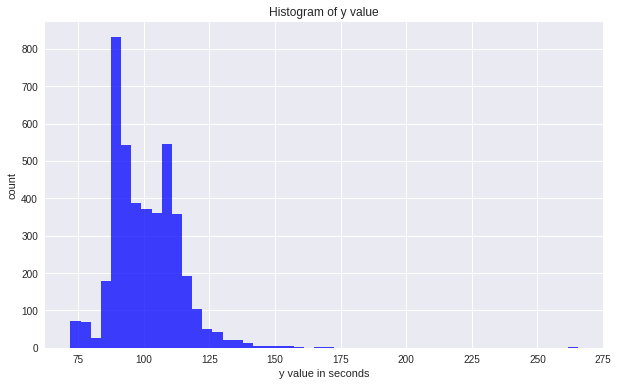

In [69]:
plt.figure(figsize = (10, 6))
n, bins, patches = plt.hist(train['y'], 50, facecolor='blue', alpha=0.75)
plt.xlabel('y value in seconds')
plt.ylabel('count')
plt.title('Histogram of y value')
plt.show();

In [70]:
train['y'].describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

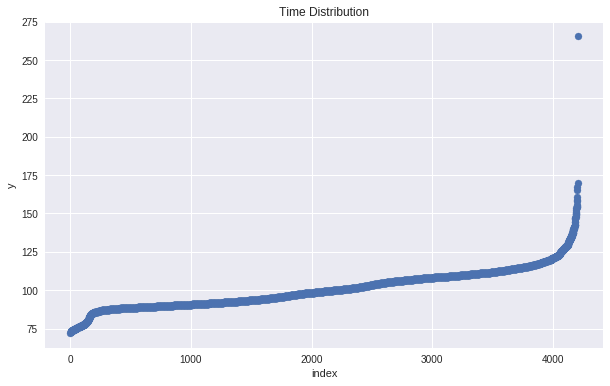

In [71]:
plt.figure(figsize = (10, 6))
plt.scatter(range(train.shape[0]), np.sort(train['y'].values))
plt.xlabel('index')
plt.ylabel('y')
plt.title("Time Distribution")
plt.show();

There is one outlier which was the max time at 265 seconds.

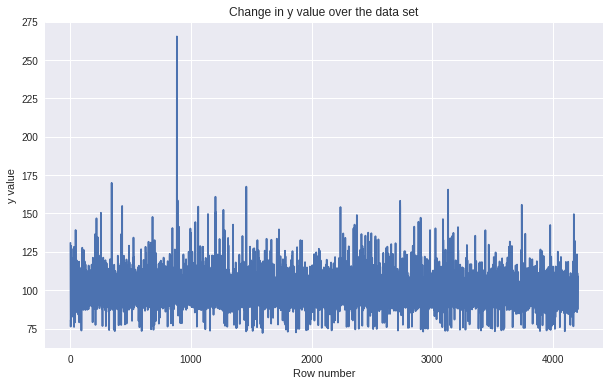

In [72]:
plt.figure(figsize=(10,6))
plt.plot(train['y'].values)
plt.xlabel('Row number')
plt.ylabel('y value')
plt.title('Change in y value over the data set')
plt.show();

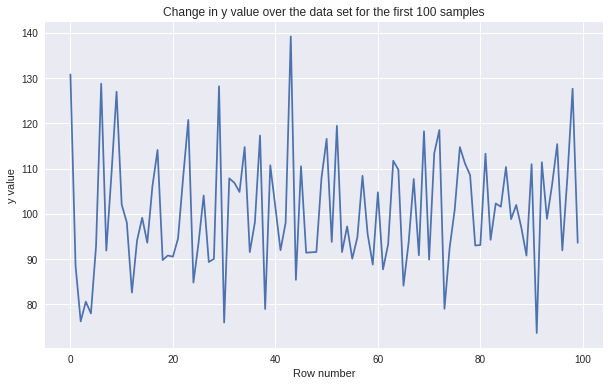

In [73]:
plt.figure(figsize=(10,6))
plt.plot(train['y'][:100].values)
plt.xlabel('Row number')
plt.ylabel('y value')
plt.title('Change in y value over the data set for the first 100 samples')
plt.show();

### Missing Values

Check for missing Values

In [74]:
missing_df = train.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


Empty DataFrame
Columns: [column_name, missing_count]
Index: []

**Good to see, there are no missing values in the dataset**

### Features Exploration

In [75]:
cols = [c for c in train.columns if 'X' in c]
print('Number of features except ID and target feature: {}'.format(len(cols)))
print('Feature types :')
train[cols].dtypes.value_counts()

Number of features except ID and target feature: 376
Feature types :


int64     368
object      8
dtype: int64

Out of all features, we are given 8 categorical features and 368 integer features. 

In [76]:
unique_values_dict = {}
for col in train.columns:
    if col not in ["ID", "y", "X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        unique_value = str(np.sort(train[col].unique()).tolist())
        tlist = unique_values_dict.get(unique_value, [])
        tlist.append(col)
        unique_values_dict[unique_value] = tlist[:]
for unique_val, columns in unique_values_dict.items():
    print("Columns containing the unique values : ",unique_val)
    print(columns)
    print("--------------------------------------------------")

Columns containing the unique values :  [0, 1]
['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145'

In [80]:
counts = [[], [], []]
for c in cols:
    typ = train[c].dtypes
    uniq = len(train[c].unique())
    if uniq == 1:
        counts[0].append(c)
    elif uniq == 2 and typ == np.int64:
        counts[1].append(c)
    else:
        counts[2].append(c)
print('Constant features: {} Binary features: {} Categorical features: {}\n'.format(*[len(c) for c in counts]))
print('Constant features: ', counts[0])
print()
print('Categorical features: ', counts[2])

Constant features: 12 Binary features: 356 Categorical features: 8

Constant features:  ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']

Categorical features:  ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


Interestingly, we have 12 features which only have a single value (0) in them - these are pretty useless for supervised algorithms, and should probably be dropped (unless you want to use them for anomaly detection in case a different value appears in the test set). 

The rest of our dataset is made up of many binary features, and 8 categorical features. Let's explore categorical features first.

### Categorical Features

In [81]:
for cat in ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']:
    print("Number of levels in category '{0}': \b {1:2}".format(cat, train[cat].nunique()))

Number of levels in category 'X0':  47
Number of levels in category 'X1':  27
Number of levels in category 'X2':  44
Number of levels in category 'X3':   7
Number of levels in category 'X4':   4
Number of levels in category 'X5':  29
Number of levels in category 'X6':  12
Number of levels in category 'X8':  25


explore every categorical feature.

#### Feature X0

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


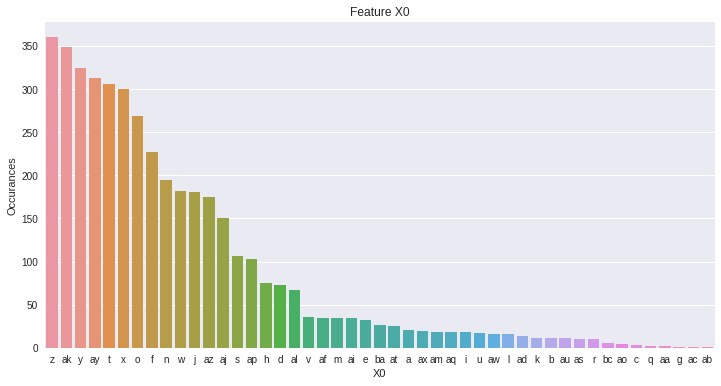

In [82]:
sort_X0 = train.groupby('X0').size()\
                    .sort_values(ascending=False)\
                    .index
plt.figure(figsize=(12,6))
sns.countplot(x='X0', data=train, order = sort_X0)
plt.xlabel('X0')
plt.ylabel('Occurances')
plt.title('Feature X0')
sns.despine();

#### X0 vs. target feature y

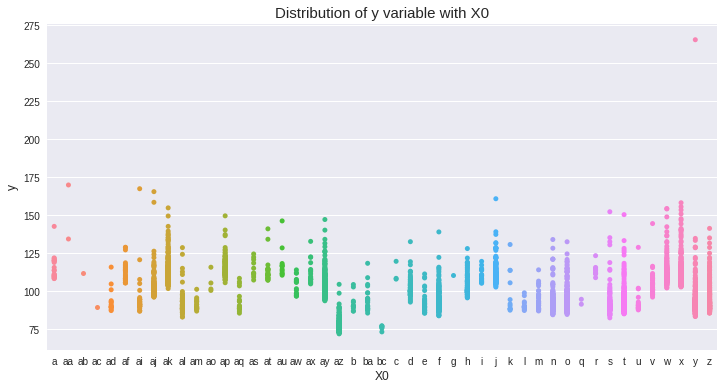

In [83]:
var_name = "X0"
col_order = np.sort(train[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=var_name, y='y', data=train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()


#### Feature X1

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


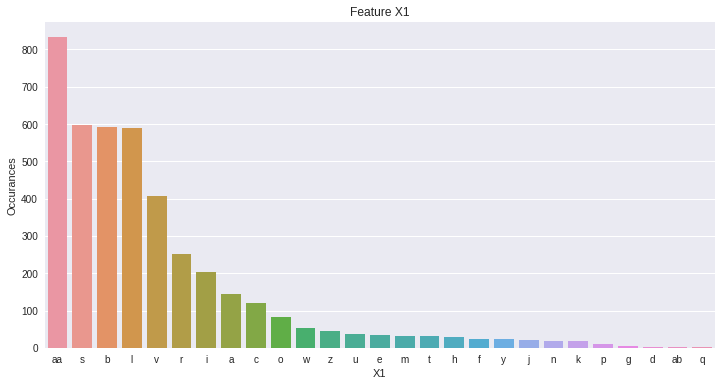

In [84]:
sort_X1 = train.groupby('X1').size()\
                    .sort_values(ascending=False)\
                    .index
plt.figure(figsize=(12,6))
sns.countplot(x='X1', data=train, order = sort_X1)
plt.xlabel('X1')
plt.ylabel('Occurances')
plt.title('Feature X1')
sns.despine();

#### X1 vs. target feature y

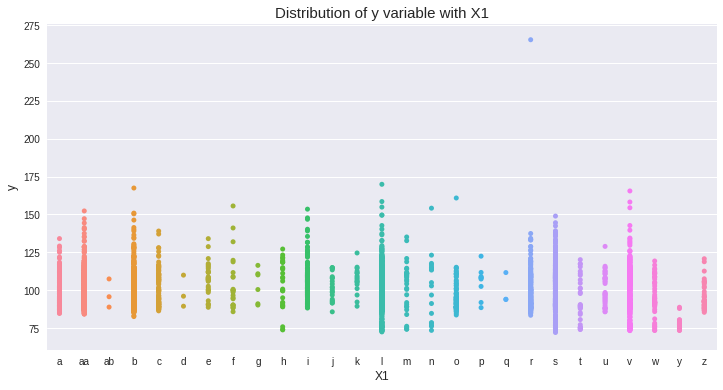

In [85]:
var_name = "X1"
col_order = np.sort(train[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=var_name, y='y', data=train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

#### Feature X2

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


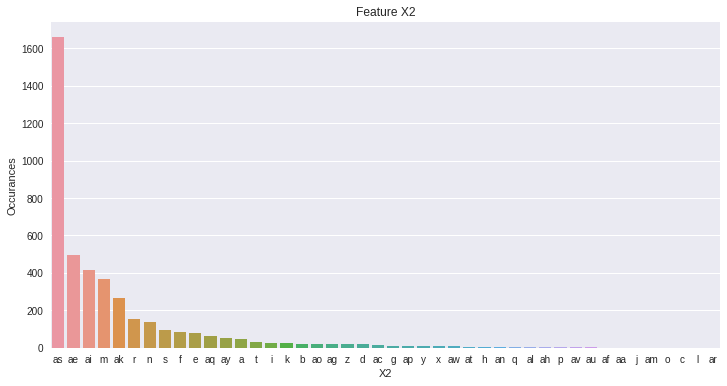

In [86]:
sort_X2 = train.groupby('X2').size()\
                    .sort_values(ascending=False)\
                    .index
plt.figure(figsize=(12,6))
sns.countplot(x='X2', data=train, order = sort_X2)
plt.xlabel('X2')
plt.ylabel('Occurances')
plt.title('Feature X2')
sns.despine();

#### X2 vs. target feature y

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


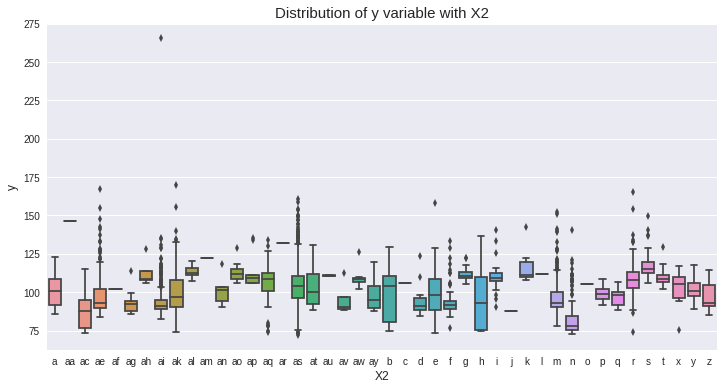

In [87]:
var_name = "X2"
col_order = np.sort(train[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var_name, y='y', data=train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

#### Feature X3

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


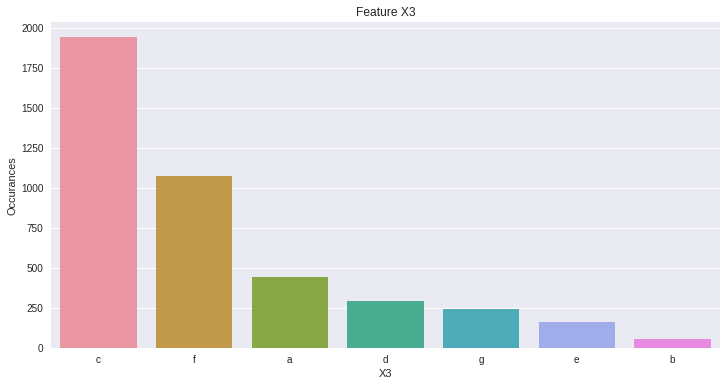

In [88]:
sort_X3 = train.groupby('X3').size()\
                    .sort_values(ascending=False)\
                    .index
plt.figure(figsize=(12,6))
sns.countplot(x='X3', data=train, order = sort_X3)
plt.xlabel('X3')
plt.ylabel('Occurances')
plt.title('Feature X3')
sns.despine();

#### X3 vs. target feature y

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


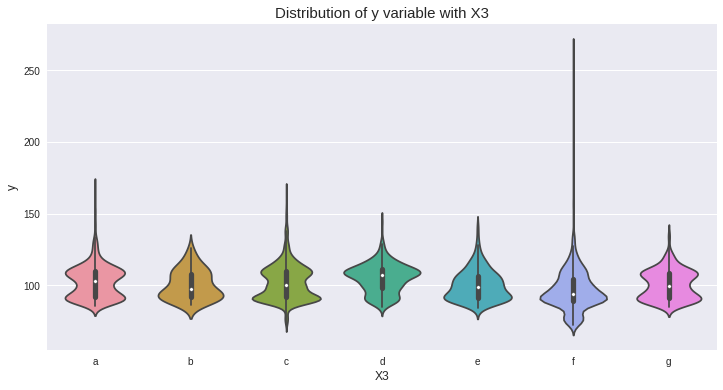

In [89]:
var_name = "X3"
col_order = np.sort(train[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var_name, y='y', data=train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()


#### Feature X4

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


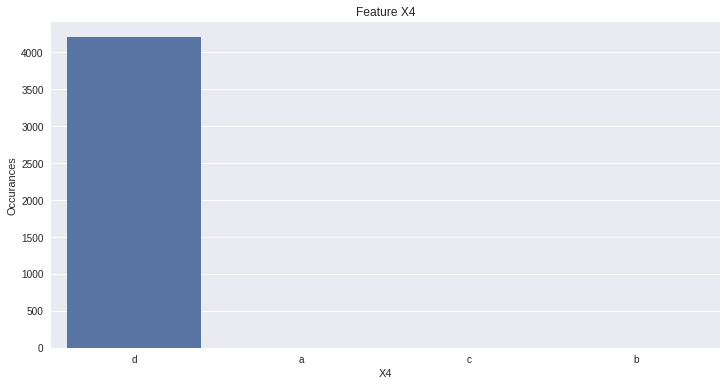

In [90]:
sort_X4 = train.groupby('X4').size()\
                    .sort_values(ascending=False)\
                    .index
plt.figure(figsize=(12,6))
sns.countplot(x='X4', data=train, order = sort_X4)
plt.xlabel('X4')
plt.ylabel('Occurances')
plt.title('Feature X4')
sns.despine();

#### X4 vs. target feature y

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


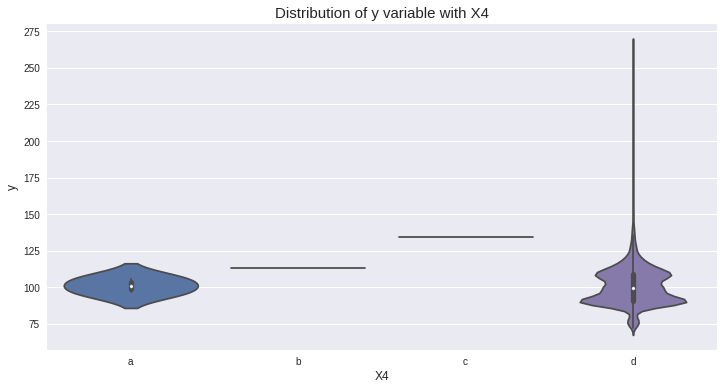

In [91]:
var_name = "X4"
col_order = np.sort(train[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var_name, y='y', data=train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

#### Feature X5

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


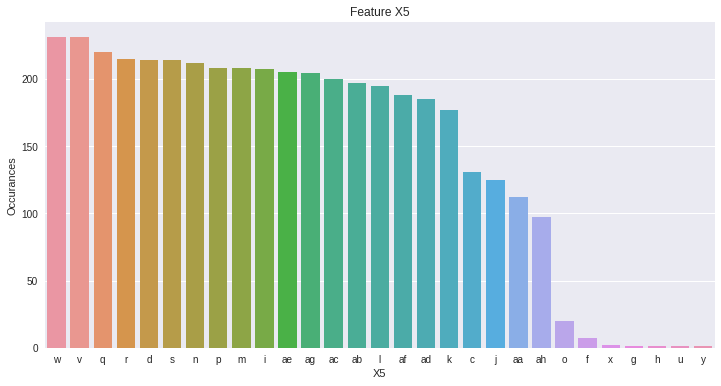

In [92]:
sort_X5 = train.groupby('X5').size()\
                    .sort_values(ascending=False)\
                    .index
plt.figure(figsize=(12,6))
sns.countplot(x='X5', data=train, order = sort_X5)
plt.xlabel('X5')
plt.ylabel('Occurances')
plt.title('Feature X5')
sns.despine();

#### X5 vs. target feature y

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


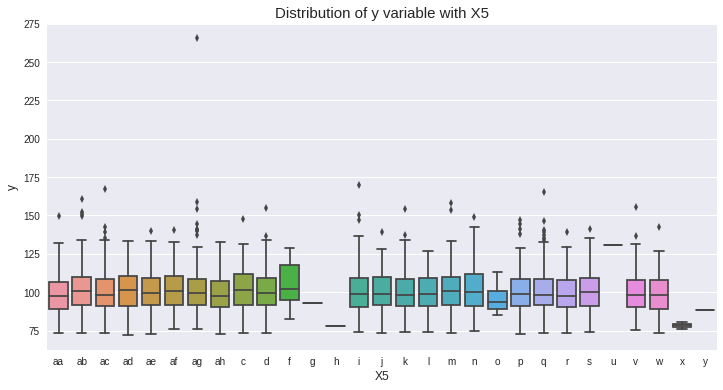

In [93]:
var_name = "X5"
col_order = np.sort(train[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var_name, y='y', data=train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()


#### Feature X6

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


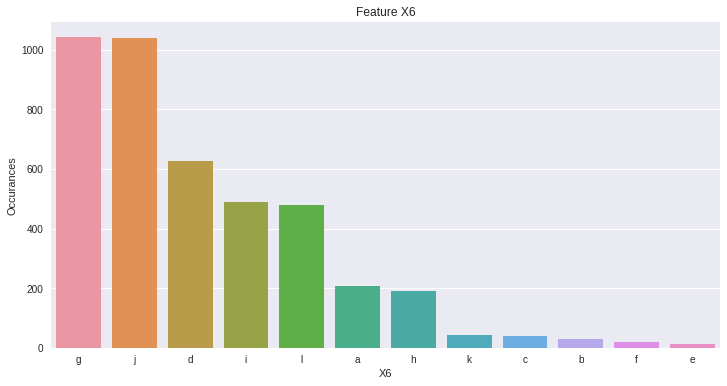

In [94]:
sort_X6 = train.groupby('X6').size()\
                    .sort_values(ascending=False)\
                    .index
plt.figure(figsize=(12,6))
sns.countplot(x='X6', data=train, order = sort_X6)
plt.xlabel('X6')
plt.ylabel('Occurances')
plt.title('Feature X6')
sns.despine();

#### X6 vs. target feature y

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


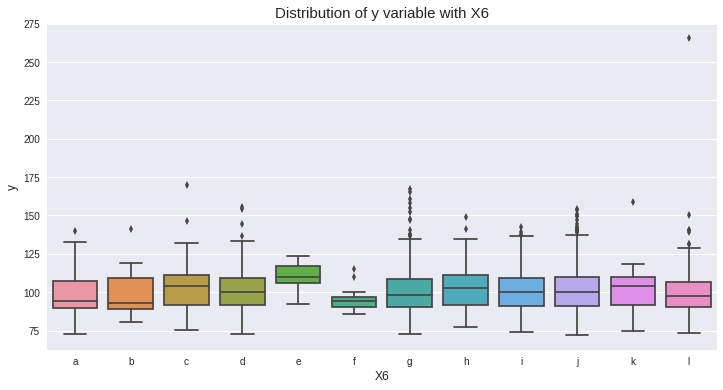

In [95]:
var_name = "X6"
col_order = np.sort(train[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var_name, y='y', data=train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()


#### Feature X8

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


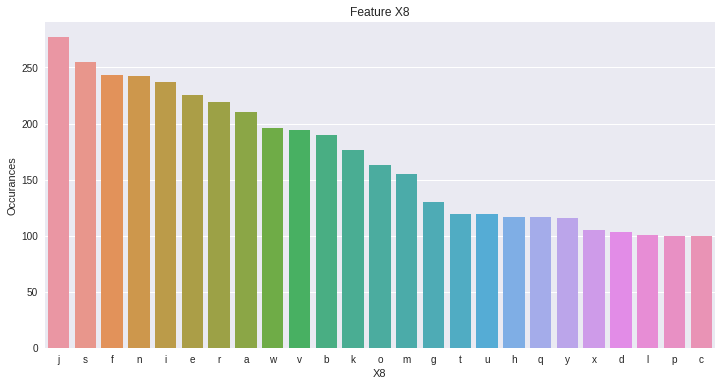

In [96]:
sort_X8 = train.groupby('X8').size()\
                    .sort_values(ascending=False)\
                    .index
plt.figure(figsize=(12,6))
sns.countplot(x='X8', data=train, order = sort_X8)
plt.xlabel('X8')
plt.ylabel('Occurances')
plt.title('Feature X8')
sns.despine();

#### X8 vs. target feature y

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


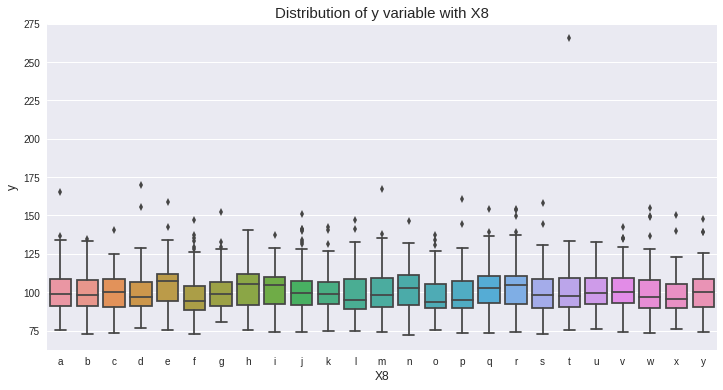

In [97]:
var_name = "X8"
col_order = np.sort(train[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var_name, y='y', data=train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

### Binary Variables

**A look on the Binary Variables**

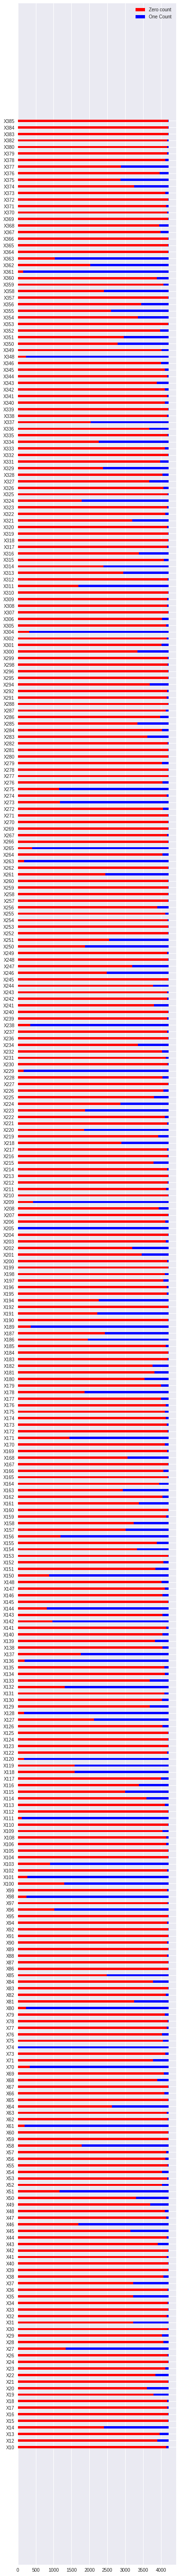

In [98]:
zero_count_list = []
one_count_list = []
cols_list = unique_values_dict['[0, 1]']
for col in cols_list:
    zero_count_list.append((train[col]==0).sum())
    one_count_list.append((train[col]==1).sum())

N = len(cols_list)
ind = np.arange(N)
width = 0.35

plt.figure(figsize=(6,100))
p1 = plt.barh(ind, zero_count_list, width, color='red')
p2 = plt.barh(ind, one_count_list, width, left=zero_count_list, color="blue")
plt.yticks(ind, cols_list)
plt.legend((p1[0], p2[0]), ('Zero count', 'One Count'))
plt.show()

**Mean y values in each of binary variables**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


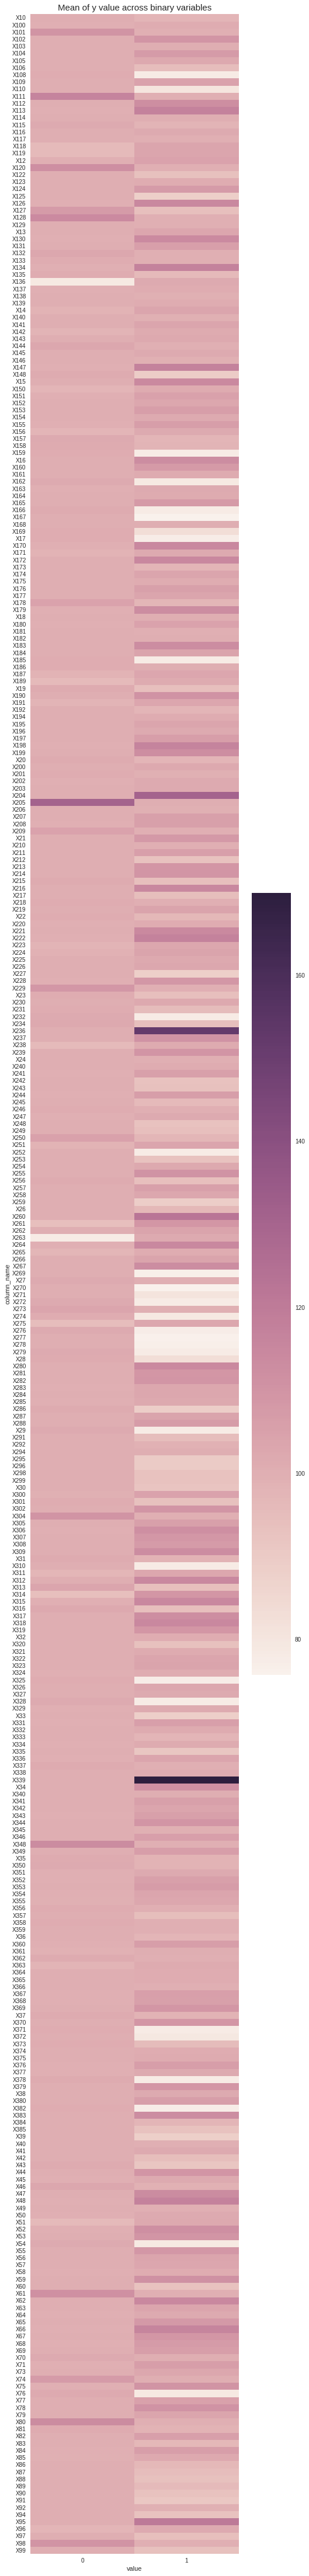

In [99]:
zero_mean_list = []
one_mean_list = []
cols_list = unique_values_dict['[0, 1]']
for col in cols_list:
    zero_mean_list.append(train.ix[train[col]==0].y.mean())
    one_mean_list.append(train.ix[train[col]==1].y.mean())

new_df = pd.DataFrame({"column_name":cols_list+cols_list, "value":[0]*len(cols_list) + [1]*len(cols_list), "y_mean":zero_mean_list+one_mean_list})
new_df = new_df.pivot('column_name', 'value', 'y_mean')

plt.figure(figsize=(8,80))
sns.heatmap(new_df)
plt.title("Mean of y value across binary variables", fontsize=15)
plt.show()


Binary variables which shows a good color difference in the above graphs between 0 and 1 are likely to be more predictive given the the count distribution is also good between both the classes

### ID Variable

** Check how the 'y' variable changes with ID variable.**

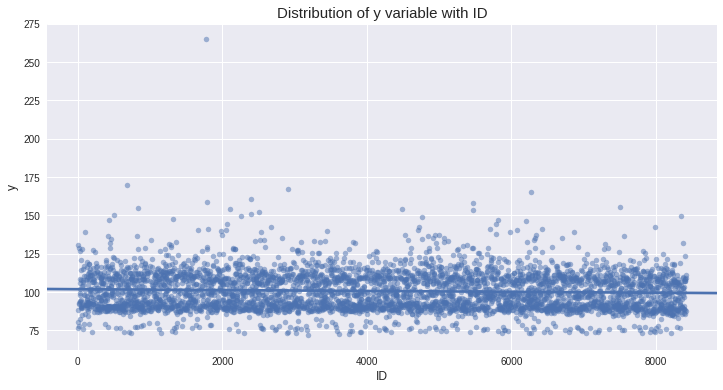

In [100]:
var_name = "ID"
plt.figure(figsize=(12,6))
sns.regplot(x=var_name, y='y', data=train, scatter_kws={'alpha':0.5, 's':30})
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

**Check How ID Variables is distributed across Train and Test.**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


<Figure size 432x720 with 0 Axes>

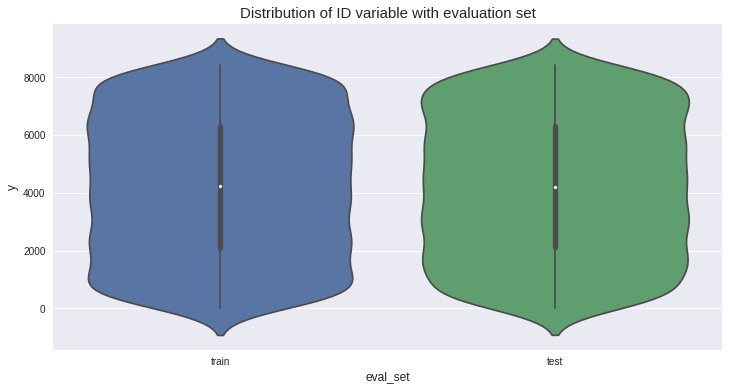

In [101]:
plt.figure(figsize=(6,10))
train['eval_set'] = "train"
test['eval_set'] = "test"
full_df = pd.concat([train[["ID","eval_set"]], test[["ID","eval_set"]]], axis=0)

plt.figure(figsize=(12,6))
sns.violinplot(x="eval_set", y='ID', data=full_df)
plt.xlabel("eval_set", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of ID variable with evaluation set", fontsize=15)
plt.show()

## LET"S Run and XG_boost  to know the Important Variables

In [0]:
for f in ["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train_df[f].values)) 
        train_df[f] = lbl.transform(list(train_df[f].values))
        
train_y = train_df['y'].values
train_X = train_df.drop(["ID", "y", "eval_set"], axis=1)

# Thanks to anokas for this #
def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100, feval=xgb_r2_score, maximize=True)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()


Categorical variables are occupied at top position followed by binary variables.

### Random Forest to check imp variables

In [0]:
from sklearn import ensemble
model = ensemble.RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_leaf=4, max_features=0.2, n_jobs=-1, random_state=0)
model.fit(train_X, train_y)
feat_names = train_X.columns.values

## plot the importances ##
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()


### Some categorical features have effects on the "y" and the "X0" seems have the highest effect.

For the categorical features, we encode the levels as digits using Scikit-learn's MultiLabelBinarizer and treat them as new features.

train1 is the duplicate dataframe of orginal train 

In [0]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

X0_trans = mlb.fit_transform([{str(val)} for val in train1['X0'].values])
X1_trans = mlb.fit_transform([{str(val)} for val in train1['X1'].values])
X2_trans = mlb.fit_transform([{str(val)} for val in train1['X2'].values])
X3_trans = mlb.fit_transform([{str(val)} for val in train1['X3'].values])
X4_trans = mlb.fit_transform([{str(val)} for val in train1['X4'].values])
X5_trans = mlb.fit_transform([{str(val)} for val in train1['X5'].values])
X6_trans = mlb.fit_transform([{str(val)} for val in train1['X6'].values])
X8_trans = mlb.fit_transform([{str(val)} for val in train1['X8'].values])

In [142]:
X8_trans

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

Then we drop the constant features and categorical features which have been MultiLabelBinarized earlier, as well as our target feature "y".

In [0]:
train_new = train.drop(['y','X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], axis=1)

We then add the encoded features to form the final dataset to be used with TPOT.

In [0]:
train_new = np.hstack((train_new.values, X0_trans, X1_trans, X2_trans, X3_trans, X4_trans, X5_trans, X6_trans, X8_trans))

In [145]:
train_new.shape

(4209, 552)

In [146]:
np.isnan(train_new).any()

False

In [147]:
train_new[0].size

552

### TPOT

In [0]:
train_class = train['y'].values

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_new, train_class,
                                                    train_size=0.75, test_size=0.25)

In [150]:
!pip install tpot

In [151]:
from tpot import TPOTRegressor

tpot = TPOTRegressor(generations=5, population_size=20, verbosity=2)
tpot.fit(X_train, y_train)

Optimization Progress:  33%|███▎      | 40/120 [08:39<23:02, 17.28s/pipeline]

Generation 1 - Current best internal CV score: -63.449710031812835


Optimization Progress:  50%|█████     | 60/120 [14:03<20:02, 20.05s/pipeline]

Generation 2 - Current best internal CV score: -63.24147669147501


Optimization Progress:  68%|██████▊   | 81/120 [25:46<14:47, 22.77s/pipeline]

Generation 3 - Current best internal CV score: -63.24147669147501


Optimization Progress:  84%|████████▍ | 101/120 [29:53<04:43, 14.92s/pipeline]

Generation 4 - Current best internal CV score: -63.24147669147501


Generation 5 - Current best internal CV score: -63.24147669147501

Best pipeline: DecisionTreeRegressor(input_matrix, max_depth=3, min_samples_leaf=6, min_samples_split=5)


TPOTRegressor(config_dict=None, crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=5,
       max_eval_time_mins=5, max_time_mins=None, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=20,
       random_state=None, scoring=None, subsample=1.0, use_dask=False,
       verbosity=2, warm_start=False)

In [152]:
print("TPOT cross-validation MSE")
print(tpot.score(X_test, y_test))

TPOT cross-validation MSE
-91.19257164446556


In [153]:
from sklearn.metrics import mean_squared_error
print('MSE:')
print(mean_squared_error(y_test, tpot.predict(X_test)))

MSE:
91.19257164446556


In [154]:
print('RMSE:')
print(np.sqrt(mean_squared_error(y_test, tpot.predict(X_test))))

RMSE:
9.549480176662264


In [155]:
tpot.export('tpot_Mercedes_testing_time_pipeline.py')

True